<a href="https://colab.research.google.com/github/pathakharsh123/Fruit_and_vegetable_detection_system/blob/master/Fruit_vegetable_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dataset




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#importing libraries


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#Data Preprocessing


#Training Image Preprocessing

In [2]:
training_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/train',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [3]:
validation_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/validation',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


## Test Image Preprocessing

In [26]:
test_set  = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/test',
     labels= 'inferred',
     label_mode = 'categorical',
     class_names =  None,
     color_mode= 'rgb',
     batch_size= 32,
     image_size= (64,64),
     shuffle = True,
     seed = None,
     validation_split= None,
     subset = None,
     interpolation = "bilinear",
     follow_links = False,
     crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


#Building model

In [4]:
cnn = tf.keras.models.Sequential()

##Building convolutional layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))# convolutional layer -> feature matrix
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))# created two convolutional layers using 32 size filters
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))   # max pool layer created by scanning the feature matrix to generate 2x2 martrix

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))# doing it again for extracting only important parametres
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu')) # again making two convolutional layers using 64 size filters
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2)) # this done to avoid underfitting by making our nureal network more complex

In [7]:
cnn.add(tf.keras.layers.Flatten()) # flattening process-flattening our 2x2 matrix

In [8]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu')) # for creating neural network

In [9]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting we are dropping some neurons

In [11]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#compiling and training Phase

In [12]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [14]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 690s 7s/step - loss: 5.9756 - accuracy: 0.0234 - val_loss: 3.5447 - val_accuracy: 0.0712
Epoch 2/32
98/98 [==============================] - 136s 1s/step - loss: 3.5645 - accuracy: 0.0398 - val_loss: 3.5056 - val_accuracy: 0.0627
Epoch 3/32
98/98 [==============================] - 137s 1s/step - loss: 3.4742 - accuracy: 0.0668 - val_loss: 3.2018 - val_accuracy: 0.1425
Epoch 4/32
98/98 [==============================] - 139s 1s/step - loss: 3.2360 - accuracy: 0.0992 - val_loss: 2.7246 - val_accuracy: 0.2194
Epoch 5/32
98/98 [==============================] - 138s 1s/step - loss: 2.9949 - accuracy: 0.1676 - val_loss: 2.5978 - val_accuracy: 0.3618
Epoch 6/32
98/98 [==============================] - 141s 1s/step - loss: 2.6586 - accuracy: 0.2530 - val_loss: 2.1092 - val_accuracy: 0.4530
Epoch 7/32
98/98 [==============================] - 137s 1s/step - loss: 2.2753 - accuracy: 0.3512 - val_loss: 1.6112 - val_accuracy: 0.5783
Epoch 8/32
98

#Saving Model

In [15]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
training_history.history # retruns dictonary of training history having loss,accurracy,valid_loss and valid_accuracy as keys and has values corresponding to these key on 30 epochs

{'loss': [5.975561618804932,
  3.564546823501587,
  3.4742467403411865,
  3.235963821411133,
  2.9948971271514893,
  2.658633232116699,
  2.2752914428710938,
  1.9460958242416382,
  1.6075557470321655,
  1.3657480478286743,
  1.1597392559051514,
  0.9232387542724609,
  0.7329674363136292,
  0.6069759726524353,
  0.5690962076187134,
  0.4828840494155884,
  0.43591025471687317,
  0.4265385866165161,
  0.3410611152648926,
  0.2670895457267761,
  0.3495062589645386,
  0.2968360185623169,
  0.27629324793815613,
  0.2869904041290283,
  0.23500509560108185,
  0.17740967869758606,
  0.18177035450935364,
  0.20174039900302887,
  0.15536649525165558,
  0.21881191432476044,
  0.22096748650074005,
  0.2558184564113617],
 'accuracy': [0.023434992879629135,
  0.039807382971048355,
  0.0667736753821373,
  0.09919743239879608,
  0.16757623851299286,
  0.25296950340270996,
  0.3512038588523865,
  0.4487961530685425,
  0.5428571701049805,
  0.6057785153388977,
  0.6686998605728149,
  0.7425361275672913,

In [17]:
# recording history in json file
import json
with open('training_hist','w') as f:
  json.dump(training_history.history,f)

In [18]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating accuracy achieved on validation set

In [19]:
print("validation accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

validation accuracy: 94.87179517745972 %


#Accuracy visualization

## Training visualization

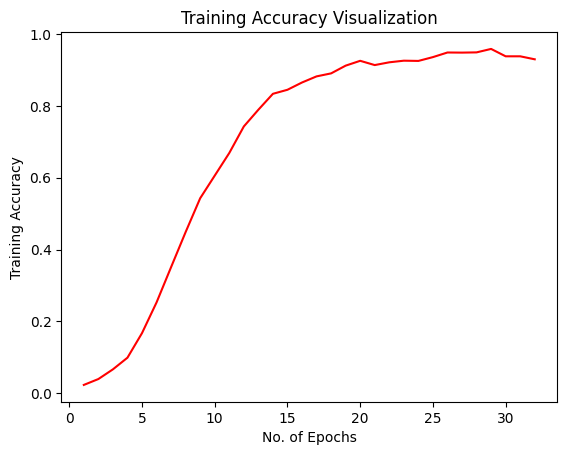

In [21]:
epochs= [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel("No. of Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Visualization")
plt.show()

##Validation Accuaracy

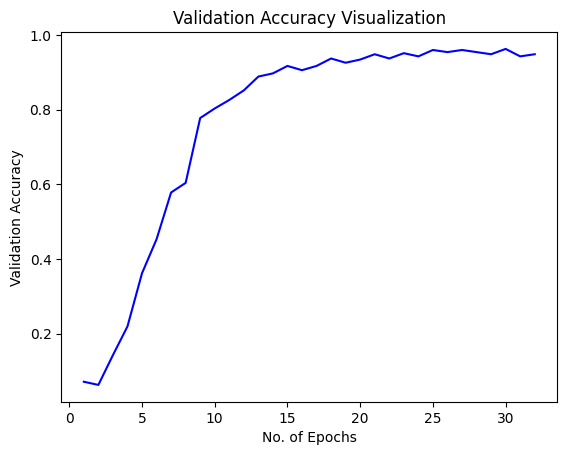

In [22]:
epochs= [i for i in range(1,33)]
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Visualization")
plt.show()

#Loading model

In [23]:
loaded_model=  tf.keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /trained_model.h5")

##visualization and Performing prediction on single image

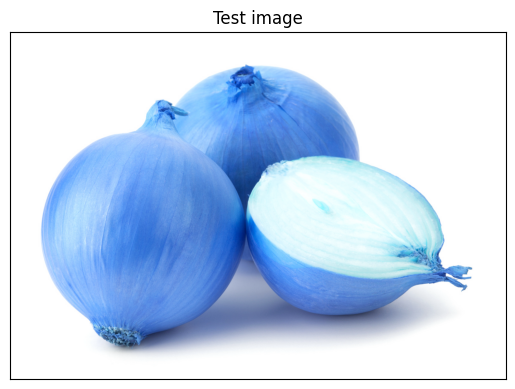

In [30]:
import cv2
img_path= '/content/drive/MyDrive/Colab_Notebooks/ML PROJECT /dataset/test/onion/Image_1.jpg'
img= cv2.imread(img_path)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

##Testing model

In [31]:
image = tf.keras.preprocessing.image.load_img(img_path,target_size=(64,64))
input_arr  = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # converting single image to batch
predictions = loaded_model.predict(input_arr)


1/1 [==============================] - 0s 27ms/step


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [32]:
result_index = np.where(predictions[0]==max(predictions[0]))
print(result_index[0][0])

20


In [33]:
print("This is a {}".format(test_set.class_names[result_index[0][0]]))

This is a onion


# Evaluating the model

In [35]:
training_loss,training_accuracy = loaded_model.evaluate(training_set)

98/98 [==============================] - 89s 827ms/step - loss: 0.1213 - accuracy: 0.9657


In [36]:
validation_loss,validation_accuracy = loaded_model.evaluate(validation_set)

11/11 [==============================] - 13s 338ms/step - loss: 0.3679 - accuracy: 0.9487


In [37]:
test_loss,test_accuracy = loaded_model.evaluate(test_set)

12/12 [==============================] - 86s 1s/step - loss: 0.3606 - accuracy: 0.9499


In [38]:
training_accuracy

0.9656500816345215

In [39]:
validation_accuracy

0.9487179517745972

In [40]:
test_accuracy

0.9498607516288757